### Dataset Feature Statistical Testing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import CSV file as pandas data frame 
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
#Create copy of orginal Dataframe
data_original = data.copy(deep = True)
#rename columns
data = data.rename(columns = {'id':'Identification Number','gender':'Gender','age':'Age',
                              'hypertension':'Hypertension','heart_disease':'Heart Disease', 
                              'ever_married':'Marriage Status','work_type':'Work Type','Residence_type':'Residence Type',
                             'avg_glucose_level':'Average Glucose Level','bmi':'Body Mass Index',
                              'smoking_status':'Smoking Status','stroke':'Stroke'})
#data type conversions
data['Age'] = data['Age'].astype('int')
data['Hypertension'] = data['Hypertension'].astype('object')
data['Stroke'] = data['Stroke'].astype('object')
data['Heart Disease'] = data['Heart Disease'].astype('object')
# Replace the missing values with mean of bmi attribute
data['Body Mass Index'].fillna(np.round(data['Body Mass Index'].mean(), 1), inplace = True)
# Deleting attribute (high cardinality)
data.drop(['Identification Number'], axis = 1, inplace = True)
#dataset head, shape, info, summary statisitcs
display(data.head(), data.shape, data.info(), data.describe(), data.describe(include=object))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 5110 non-null   object 
 1   Age                    5110 non-null   int32  
 2   Hypertension           5110 non-null   object 
 3   Heart Disease          5110 non-null   object 
 4   Marriage Status        5110 non-null   object 
 5   Work Type              5110 non-null   object 
 6   Residence Type         5110 non-null   object 
 7   Average Glucose Level  5110 non-null   float64
 8   Body Mass Index        5110 non-null   float64
 9   Smoking Status         5110 non-null   object 
 10  Stroke                 5110 non-null   object 
dtypes: float64(2), int32(1), object(8)
memory usage: 419.3+ KB


,Gender,Age,Hypertension,Heart Disease,Marriage Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index,Smoking Status,Stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


(5110, 11)

None

,Age,Average Glucose Level,Body Mass Index
count,5110.000000,5110.000000,5110.000000
mean,43.215264,106.147677,28.893503
std,22.633866,45.283560,7.698018
min,0.000000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


,Gender,Hypertension,Heart Disease,Marriage Status,Work Type,Residence Type,Smoking Status,Stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


##### Analysing Numerical Distributions (Indepedent Variables)

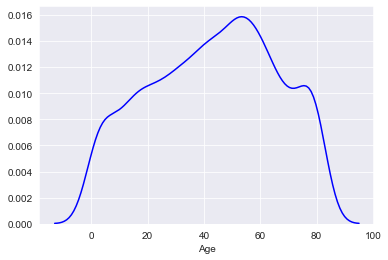

None

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: Age, dtype: float64

In [3]:
#Kernel density plot
sns.distplot(data['Age'], kde = True, hist = False, color = 'b')
sns.set_style('darkgrid')
display(plt.show(), data['Age'].describe())

###### Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

Assumptions:
- Observations in each sample are independent and identically distributed (iid).

Interpretation:
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [44]:
#Interpretation
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

from scipy.stats import shapiro
test_1 = data['Age']
stat, p = shapiro(test_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Age variable probable to follow a Gaussian DIstribution')
else:
	print('Age variable probable not to follow a Gaussian Distribution')

stat=0.968, p=0.000
Age variable probable not to follow a Gaussian Distribution


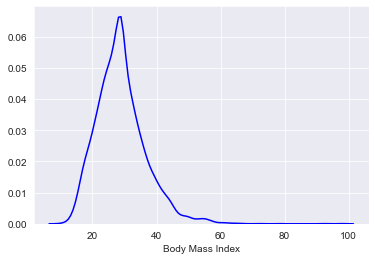

None

count    5110.000000
mean       28.893503
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: Body Mass Index, dtype: float64

In [5]:
#Kernel density plot
sns.distplot(data['Body Mass Index'], kde = True, hist = False, color = 'b')
sns.set_style('darkgrid')
display(plt.show(), data['Body Mass Index'].describe())

In [48]:
#Interpretation
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

from scipy.stats import shapiro
test_2 = data['Body Mass Index']
stat, p = shapiro(test_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Body Mass Index variable probable to follow a Gaussian DIstribution')
else:
	print('Body Mass Index variable probable not to follow a Gaussian Distribution')

stat=0.952, p=0.000
Body Mass Index variable probable not to follow a Gaussian Distribution


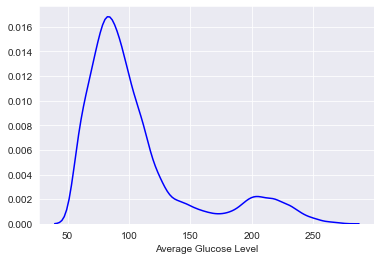

None

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: Average Glucose Level, dtype: float64

In [6]:
#Kernel density plot
sns.distplot(data['Average Glucose Level'], kde = True, hist = False, color = 'b')
sns.set_style('darkgrid')
display(plt.show(), data['Average Glucose Level'].describe())

In [49]:
#Interpretation
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

from scipy.stats import shapiro
test_3 = data['Average Glucose Level']
stat, p = shapiro(test_3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Average Glucose Level variable probable to follow a Gaussian DIstribution')
else:
	print('Average Glucose Level variable probable not to follow a Gaussian Distribution')

stat=0.806, p=0.000
Average Glucose Level variable probable not to follow a Gaussian Distribution


##### Correlation Analysis (Independent Variables)
Pearson’s Correlation Coefficient
Tests whether two samples have a linear relationship.

In [7]:
#Compute Pearsons R Correlation
correlation = data.corr()
correlation

,Age,Average Glucose Level,Body Mass Index
Age,1.000000,0.238060,0.326284
Average Glucose Level,0.238060,1.000000,0.168767
Body Mass Index,0.326284,0.168767,1.000000


##### Analysing  Distribution (Dependent Variable)

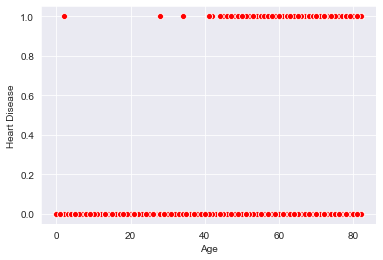

In [8]:
#scatterplot
sns.scatterplot(x = 'Age', y = 'Heart Disease', color = 'r', data = data)
plt.show()

Confirming through visualization our indepedent variable meets the binary (dichotomous) condition for Logisitic Regression.

### Analysing Categorical Variables

###### Chi-Squared Test
Tests whether two categorical variables are related or independent.

Assumptions:
- Observations used in the calculation of the contingency table are independent.
- 25 or more examples in each cell of the contingency table.

Test Result Interpretation
- H0: the two samples are independent.
- H1: there is a dependency between the samples.

###### GENDER

In [13]:
#import chi-square test
from scipy.stats import chi2_contingency

#create crosstab (testing)
crosstab_1 = pd.crosstab(data['Gender'], data['Marriage Status'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Marriage Status Probable Independent')
else:
    print('Gender and Marriage Status Probable Dependent')

stat=6.559, p=0.038
Gender and Marriage Status Probable Dependent


In [14]:
#create crosstab (testing)
crosstab_2 = pd.crosstab(data['Gender'], data['Hypertension'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Hypertension Probable Independent')
else:
    print('Gender and Hypertension Probable Dependent')

stat=2.410, p=0.300
Gender and Hypertension Probable Independent


In [15]:
#create crosstab (testing)
crosstab_3 = pd.crosstab(data['Gender'], data['Work Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Work Type Probable Independent')
else:
    print('Gender and Work Type Probable Dependent')

stat=43.075, p=0.000
Gender and Work Type Probable Dependent


In [16]:
#create crosstab (testing)
crosstab_4 = pd.crosstab(data['Gender'], data['Residence Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_4)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Residence Type Probable Independent')
else:
    print('Gender and Residence Type Probable Dependent')

stat=1.223, p=0.542
Gender and Residence Type Probable Independent


In [19]:
#create crosstab (testing)
crosstab_5 = pd.crosstab(data['Gender'], data['Smoking Status'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_5)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Smoking Status Probable Independent')
else:
    print('Gender and Smoking Status Probable Dependent')

stat=57.338, p=0.000
Gender and Smoking Status Probable Dependent


In [20]:
#create crosstab (testing)
crosstab_6 = pd.crosstab(data['Gender'], data['Stroke'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_6)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Gender and Stroke Probable Independent')
else:
    print('Gender and Stroke Probable Dependent')

stat=0.473, p=0.790
Gender and Stroke Probable Independent


##### Marriage Status

In [21]:
#create crosstab (testing)
crosstab_2a = pd.crosstab(data['Marriage Status'], data['Hypertension'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_2a)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Marriage Status and Hypertension Probable Independent')
else:
    print('Marriage Status and Hypertension Probable Dependent')

stat=136.683, p=0.000
Marriage Status and Hypertension Probable Dependent


In [27]:
#create crosstab (testing)
crosstab_3b = pd.crosstab(data['Marriage Status'], data['Work Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_3b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Marriage Status and Work Type Probable Independent')
else:
    print('Marriage Status and Work Type Probable Dependent')

stat=1644.109, p=0.000
Marriage Status and Work Type Probable Dependent


In [28]:
#create crosstab (testing)
crosstab_4b = pd.crosstab(data['Marriage Status'], data['Residence Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_4b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Marriage Status and Residence Type Probable Independent')
else:
    print('Marriage Status and Residence Type Probable Dependent')

stat=0.175, p=0.676
Marriage Status and Residence Type Probable Independent


In [29]:
#create crosstab (testing)
crosstab_5b = pd.crosstab(data['Marriage Status'], data['Smoking Status'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_5b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Marriage Status and Smoking Status Probable Independent')
else:
    print('Marriage Status and Smoking Status Probable Dependent')

stat=599.046, p=0.000
Marriage Status and Smoking Status Probable Dependent


In [30]:
#create crosstab (testing)
crosstab_6b = pd.crosstab(data['Marriage Status'], data['Stroke'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_6b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Marriage Status and Stroke Probable Independent')
else:
    print('Marriage Status and Stroke Probable Dependent')

stat=58.924, p=0.000
Marriage Status and Stroke Probable Dependent


##### Hypertension

In [31]:
#create crosstab (testing)
crosstab_2aa = pd.crosstab(data['Hypertension'], data['Work Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_2aa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Hypertension & Work Type Probable Independent')
else:
    print('Hypertension & Work Type Probable Dependent')

stat=135.200, p=0.000
Hypertension & Work Type Probable Dependent


In [32]:
#create crosstab (testing)
crosstab_3aa = pd.crosstab(data['Hypertension'], data['Residence Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_3aa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Hypertension & Residence Type Probable Independent')
else:
    print('Hypertension & Residence Type Probable Dependent')

stat=0.269, p=0.604
Hypertension & Residence Type Probable Independent


In [34]:
#create crosstab (testing)
crosstab_4aa = pd.crosstab(data['Hypertension'], data['Smoking Status'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_4aa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Hypertension & Smoking Status Probable Independent')
else:
    print('Hypertension & Smoking Status Probable Dependent')

stat=103.874, p=0.000
Hypertension & Smoking Status Probable Dependent


In [35]:
#create crosstab (testing)
crosstab_5aa = pd.crosstab(data['Hypertension'], data['Stroke'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_5aa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Hypertension & Stroke Probable Independent')
else:
    print('Hypertension & Stroke Probable Dependent')

stat=81.605, p=0.000
Hypertension & Stroke Probable Dependent


##### Work Type

In [36]:
#create crosstab (testing)
crosstab_1aaa = pd.crosstab(data['Work Type'], data['Residence Type'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_1aaa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Work Type & Residence Type Probable Independent')
else:
    print('Work Type & Residence Type Probable Dependent')

stat=4.653, p=0.325
Work Type & Residence Type Probable Independent


In [38]:
#create crosstab (testing)
crosstab_2aaa = pd.crosstab(data['Work Type'], data['Smoking Status'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_2aaa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Work Type & Smoking Status Probable Independent')
else:
    print('Work Type & Smoking Status Probable Dependent')

stat=1389.107, p=0.000
Work Type & Smoking Status Probable Dependent


In [40]:
#create crosstab (testing)
crosstab_3aaa = pd.crosstab(data['Work Type'], data['Stroke'])
#perfrom chi - square test
stat, p, dof, expected = chi2_contingency(crosstab_3aaa)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Work Type & Stroke Probable Independent')
else:
    print('Work Type & Stroke Probable Dependent')

stat=49.164, p=0.000
Work Type & Stroke Probable Dependent


##### Smoking Status 

##### Stroke